<a href="https://colab.research.google.com/github/bmnidhin/tfnotes/blob/master/findclothing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Computer Vision
Fashion Dataset

In [1]:
import tensorflow as tf
print(tf.__version__)

2.2.0



0 T-shirt/top

1 Trouser

2 Pullover

3 Dress

4 Coat

5 Sandal

6 Shirt

7 Sneaker

8 Bag

9 Ankle boot

In [2]:
mnist = tf.keras.datasets.fashion_mnist

In [3]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


Experiment with labels

this is the label
2
this is the image
[[  0   0   0   0   1   0   0   0   0  22  88 188 172 132 125 141 199 143
    9   0   0   0   1   0   0   0   0   0]
 [  0   0   0   1   0   0  20 131 199 206 196 202 242 255 255 250 222 197
  206 188 126  17   0   0   0   0   0   0]
 [  0   0   0   1   0  35 214 191 183 178 175 168 150 162 159 152 158 179
  183 189 195 185  82   0   0   0   0   0]
 [  0   0   0   0   0 170 190 172 177 176 171 169 162 155 148 154 169 174
  175 175 177 183 188  12   0   0   0   0]
 [  0   0   0   0  25 194 180 178 174 184 187 189 187 184 181 189 200 197
  193 190 178 175 194  90   0   0   0   0]
 [  0   0   0   0  42 218 191 197 208 204 211 209 210 212 211 214 215 213
  214 211 211 191 200 158   0   0   0   0]
 [  0   0   0   0  88 221 215 217 219 211 185 150 118 107  99  88  83  90
  135 212 203 207 219 169   0   0   0   0]
 [  0   0   0   0   0  27 118 162  40   0   0   0  10  19  28  39  47  36
    0   0 203 230 220 203   0   0   0   0]
 [  0   0   0   0 138 136 

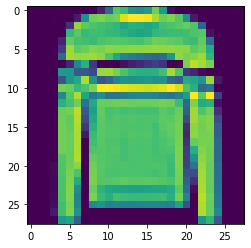

In [8]:
import matplotlib.pyplot as plt
plt.imshow(training_images[5])

print("this is the label")
print(training_labels[5])

print("this is the image")
print(training_images[5])

You'll notice that all of the values are integers between 0 and 255. When training a neural network, for various reasons it's easier to treat all values as between 0 and 1, a process called normalization. Fortunately, Python provides an easy way to normalize a list like this without looping:

In [9]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

this is the label
5
this is the image
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.00392157 0.00392157 0.         0.         0.
  0.         0.         0.         0.         0.64313725 0.19607843
  0.         0.02745098 0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.0039215

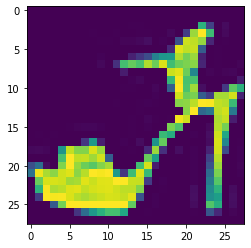

In [11]:
import matplotlib.pyplot as plt
plt.imshow(training_images[9])

print("this is the label")
print(training_labels[9])

print("this is the image")
print(training_images[9])

# Training

From first model (part 1)

```
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
```



Let's now design the model. If you went through Codelab 1, this will look familiar. But instead of one layer with one neuron, you'll have three layers. Let's go through these one-by-one and explore the different types of layer and the parameters used for each:

In [14]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

Sequential: This defines a SEQUENCE of layers in the neural network.

Flatten: Remember earlier, our images were a square when they are printed out. Flatten just takes that square and turns it into a one-dimensional vector.

Dense: Adds a layer of neurons.

Each layer of neurons needs an activation function to tell them what to do. There are lots of options, but use these for now.

Relu effectively means if X>0 return X, else return 0. It only passes values 0 or greater to the next layer in the network.

Softmax takes a set of values, and effectively picks the biggest one. For example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], it saves you from saving to sort for the largest value—it returns [0,0,0,0,1,0,0,0,0].

# Compiling and Training the Model

Now that the model is defined, the next thing to do is build it. Create a model by first compiling it with an optimizer and loss function, then train it on your training data and labels. The goal is to have the model figure out the relationship between the training data and its training labels. Later, you want your model to see data that resembles your training data then make a prediction about what that data should look like.

You'll notice we also use the `metrics=` parameter. This allows TensorFlow to report back about how accurate the training is against the test set. It measures how many it got right and wrong, and reports back on how it's doing.

In [16]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])



```
model.compile(optimizer = tf.train.AdamOptimizer(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
```



In [17]:
model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5038 - accuracy: 0.8221
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3723 - accuracy: 0.8655
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3363 - accuracy: 0.8783
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3162 - accuracy: 0.8842
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2984 - accuracy: 0.8889


# Testing
testing with data it hasn't seen

In [18]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.3818 - accuracy: 0.8657


[0.38178399205207825, 0.8657000064849854]

# Predict

In [22]:
classifications = model.predict(test_images)
print(classifications[0])

[2.5274629e-05 8.9056712e-06 7.0250366e-07 7.7777159e-08 1.7964209e-06
 1.6500529e-02 1.8471476e-06 3.4484915e-02 6.4384505e-05 9.4891161e-01]


The output of the model is a list of 10 numbers. These numbers are a probability that the value being classified is the corresponding label, i.e. the first value in the list is the probability that the clothing is of class '0', the next is a '1' etc. Notice that they are all VERY LOW probabilities except one. Also, because of Softmax, all the probabilities in this list sum to 1.0.

Both the list and the labels are 0 based, so the ankle boot having label 9 means that it is the 10th of the 10 classes. The list having the 10th element being the highest value means that the neural network has predicted that the item it is classifying is most likely an ankle boot